### Collection of pandas manipulation questions and some gotchas!

1. What is the overall friend acceptance rate by date? Your output should have the rate of acceptances by the date the request was sent. Order by the earliest date to latest.

You might be tempted to just groupby date or pivot by date or merge df_accepted and df_sent by date, but one needs to merge df_accepted and df_sent by user_id_sender and reciever first (with joining by sender df) and then groupby date

[link to problem](https://platform.stratascratch.com/coding/10285-acceptance-rate-by-date?python=1)

2. Find the date with the highest total energy consumption from the Facebook data centers. Output the date along with the total energy consumption across all data centers.

When asked for find the place with the maximum this or that, make sure you check for duplicates, ie, find all columns where column_value == max_column_value

[link to problem](https://platform.stratascratch.com/coding/10064-highest-energy-consumption?python=1)


3. Given a table of purchases by date, calculate the month-over-month percentage change in revenue. The output should include the year-month date (YYYY-MM) and percentage change, rounded to the 2nd decimal point, and sorted from the beginning of the year to the end of the year.
The percentage change column will be populated from the 2nd month forward and can be calculated as ((this month's revenue - last month's revenue) / last month's revenue)*100.

[link to problem](https://platform.stratascratch.com/coding/10319-monthly-percentage-difference?python=1)

**Tip:** To convert date to just month, `df['col'].dt.to_period('M')`

4. Find the best selling item for each month (no need to separate months by year) where the biggest total invoice was paid. The best selling item is calculated using the formula (unitprice * quantity). Output the description of the item along with the amount paid.

Tricky since one needs to output description alongwith total price. Best to first groupby month and desc, sort by total val, then groupby month again, take the maximum and then display

5. Find the number of Apple product users and the number of total users with a device for each language. Assume Apple products are only MacBook-Pro, iPhone 5s, and iPad-air.  Output the language along with the total number of Apple users and users with any device. Order your results based on the number of total users in descending order

The trick is to be careful when to use unique and when to use sum!
[link to problem](https://platform.stratascratch.com/coding/10141-apple-product-counts?python=1)

6. Find the total costs and total customers acquired in each year. Output the year along with corresponding total money spent and total acquired customers.

It's not a hard question, but it taught me how to apply different aggregation functions on individual columns in a groupby....
[link to problem](https://platform.stratascratch.com/coding/10009-find-the-total-costs-and-total-customers-acquired-in-each-year?python=1)

7. Find the top 5 least paid employees for each job title. 
One can simply use `.rank()` to a groupby object to rank the rows by the specified value. The function is very handy for ranking

[link to problem](https://platform.stratascratch.com/coding/9986-find-the-top-5-least-paid-employees-for-each-job-title?python=1)

8. Find all people who earned more than the average in 2013 for their designation but were not amongst the top 5 earners for their job title. Use the totalpay column to calculate total earned and output the employee name(s) as the result.

This is tricky because we need the mean, as well as the ranking. A pretty neat solution is to first populate a column with mean for each job title and then rank it within each title
[link to problem](https://platform.stratascratch.com/coding/9985-above-average-but-not-at-the-top?python=1)

9. Find all the users who were active for 3 consecutive days or more.
In order to apply a function to the groupby object, we can just take the indices and then merge (virtually) and access those indices. Pretty neat sol
[link to problem](https://platform.stratascratch.com/coding/2054-consecutive-days?python=1)

#### Code a bootstrap to calculate confidence intervals of the median

In [34]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

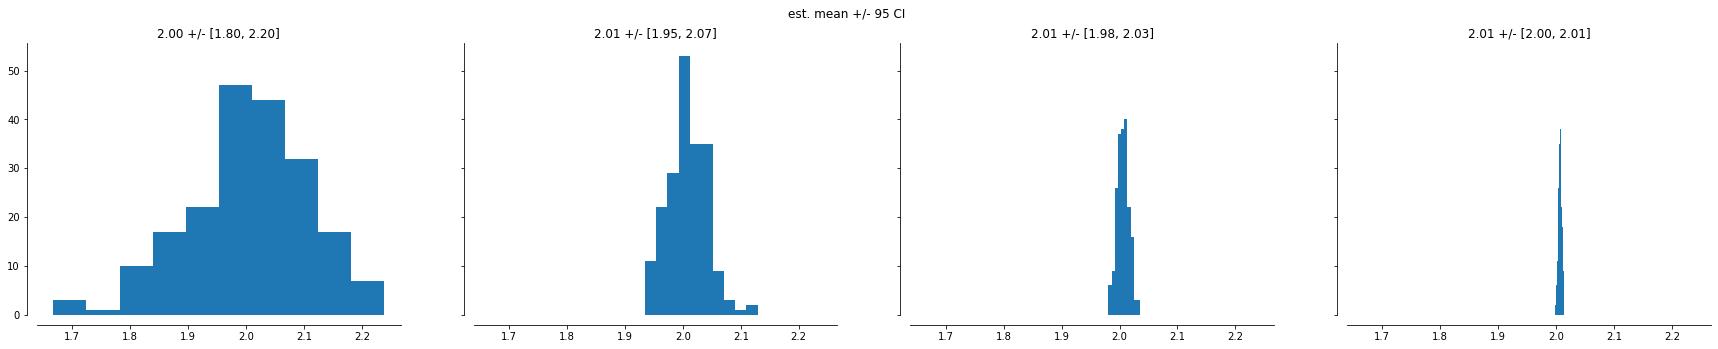

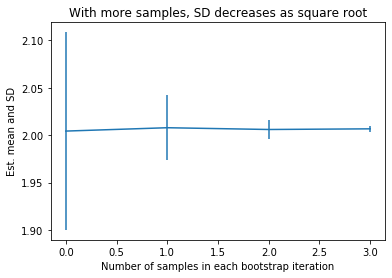

In [37]:
N=100000;
xpop = np.random.normal(loc=2,scale=1,size=(N,))

Nbs=200; nsample=[100, 1000, 10000, 100000];
sampled_mean = np.zeros((Nbs,len(nsample)))

f, ax = plt.subplots(1,4,figsize=(30,5),sharex=True, sharey=True)
for isample, sample_n in enumerate(nsample):
    for ibs in range(Nbs):
        xbs = random.choices(xpop.tolist(),k=sample_n);
        sampled_mean[ibs,isample] = np.mean(xbs)
    ax[isample].hist(sampled_mean[:,isample]); 
    mean = np.mean(sampled_mean[:,isample])
    lower, upper = np.percentile(sampled_mean[:,isample], 2.5), np.percentile(sampled_mean[:,isample],97.5)
    ax[isample].set_title(f'{mean:0.2f} +/- [{lower:0.2f}, {upper:0.2f}]')
    sns.despine(offset=10);
plt.suptitle('est. mean +/- 95 CI')


f, ax = plt.subplots()    
mean_sampled_mean, sd_sampled_mean = np.mean(sampled_mean, axis=0), np.std(sampled_mean, axis=0)
plt.errorbar(np.arange(0,len(mean_sampled_mean)),mean_sampled_mean, sd_sampled_mean)
plt.xlabel('Number of samples in each bootstrap iteration'); plt.ylabel('Est. mean and SD')
plt.title('With more samples, SD decreases as square root');

In [38]:
sd_sampled_mean*np.sqrt(nsample)

array([1.04285167, 1.07707109, 1.010065  , 1.09361104])